In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from collections import defaultdict

In [2]:
df = pd.read_csv("/Users/matteoppa/Desktop/fma_metadata/df_to_work1.csv")

In [3]:
column2drop= ["Unnamed: 0"]

In [4]:
df.drop(column2drop, inplace=True, axis=1)

In [5]:
class_name = 'liked'

In [6]:
from sklearn.model_selection import train_test_split
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=100, stratify=y)

In [7]:
feature_names = attributes

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [12]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.9477652807616159
F1-score [0.96978999 0.80721393]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19947
         1.0       0.98      0.68      0.81      3792

    accuracy                           0.95     23739
   macro avg       0.96      0.84      0.89     23739
weighted avg       0.95      0.95      0.94     23739



In [14]:
classification_report(y_val, y_pred, output_dict=True)

{'0.0': {'precision': 0.9433148490449784,
  'recall': 0.9977941545094501,
  'f1-score': 0.9697899917166107,
  'support': 19947},
 '1.0': {'precision': 0.9833333333333333,
  'recall': 0.6845991561181435,
  'f1-score': 0.8072139303482588,
  'support': 3792},
 'accuracy': 0.9477652807616159,
 'macro avg': {'precision': 0.9633240911891559,
  'recall': 0.8411966553137968,
  'f1-score': 0.8885019610324347,
  'support': 23739},
 'weighted avg': {'precision': 0.9497072873288759,
  'recall': 0.9477652807616159,
  'f1-score': 0.9438205564114678,
  'support': 23739}}

In [16]:
import json
json.dumps(classification_report(y_val, y_pred, output_dict=True))

'{"0.0": {"precision": 0.9433148490449784, "recall": 0.9977941545094501, "f1-score": 0.9697899917166107, "support": 19947}, "1.0": {"precision": 0.9833333333333333, "recall": 0.6845991561181435, "f1-score": 0.8072139303482588, "support": 3792}, "accuracy": 0.9477652807616159, "macro avg": {"precision": 0.9633240911891559, "recall": 0.8411966553137968, "f1-score": 0.8885019610324347, "support": 23739}, "weighted avg": {"precision": 0.9497072873288759, "recall": 0.9477652807616159, "f1-score": 0.9438205564114678, "support": 23739}}'

In [17]:
json.loads(json.dumps(classification_report(y_val, y_pred, output_dict=True)))

{'0.0': {'precision': 0.9433148490449784,
  'recall': 0.9977941545094501,
  'f1-score': 0.9697899917166107,
  'support': 19947},
 '1.0': {'precision': 0.9833333333333333,
  'recall': 0.6845991561181435,
  'f1-score': 0.8072139303482588,
  'support': 3792},
 'accuracy': 0.9477652807616159,
 'macro avg': {'precision': 0.9633240911891559,
  'recall': 0.8411966553137968,
  'f1-score': 0.8885019610324347,
  'support': 23739},
 'weighted avg': {'precision': 0.9497072873288759,
  'recall': 0.9477652807616159,
  'f1-score': 0.9438205564114678,
  'support': 23739}}

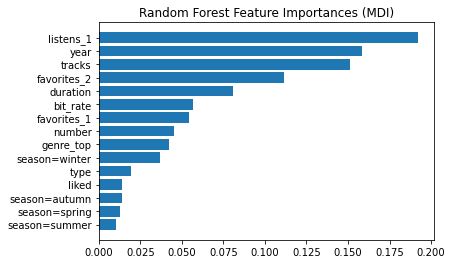

In [20]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [21]:
from sklearn.inspection import permutation_importance

In [23]:
result = permutation_importance(clf, X_val, y_val, n_repeats=10, random_state=42, n_jobs=2)

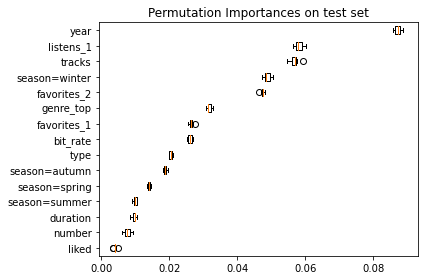

In [25]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances on test set")
plt.tight_layout()
plt.show()

In [43]:
import pydotplus
from sklearn import tree
from IPython.display import Image
import graphviz
from sklearn.tree import export_graphviz

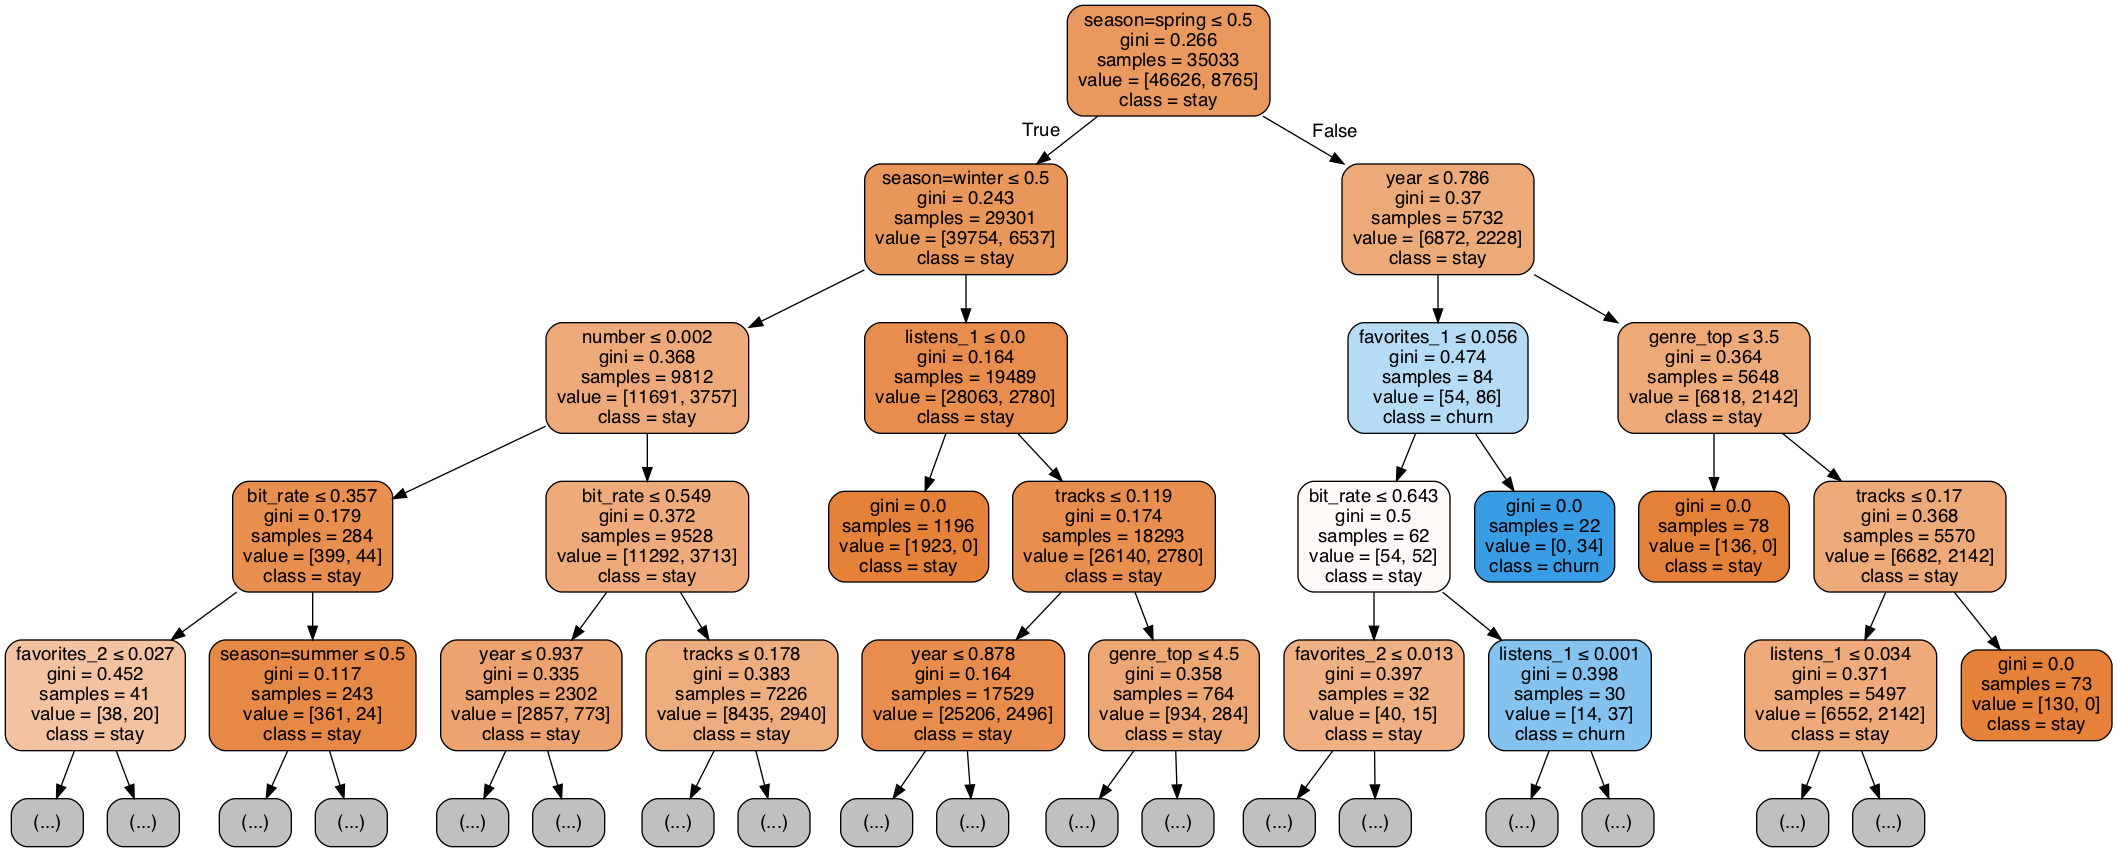

In [47]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

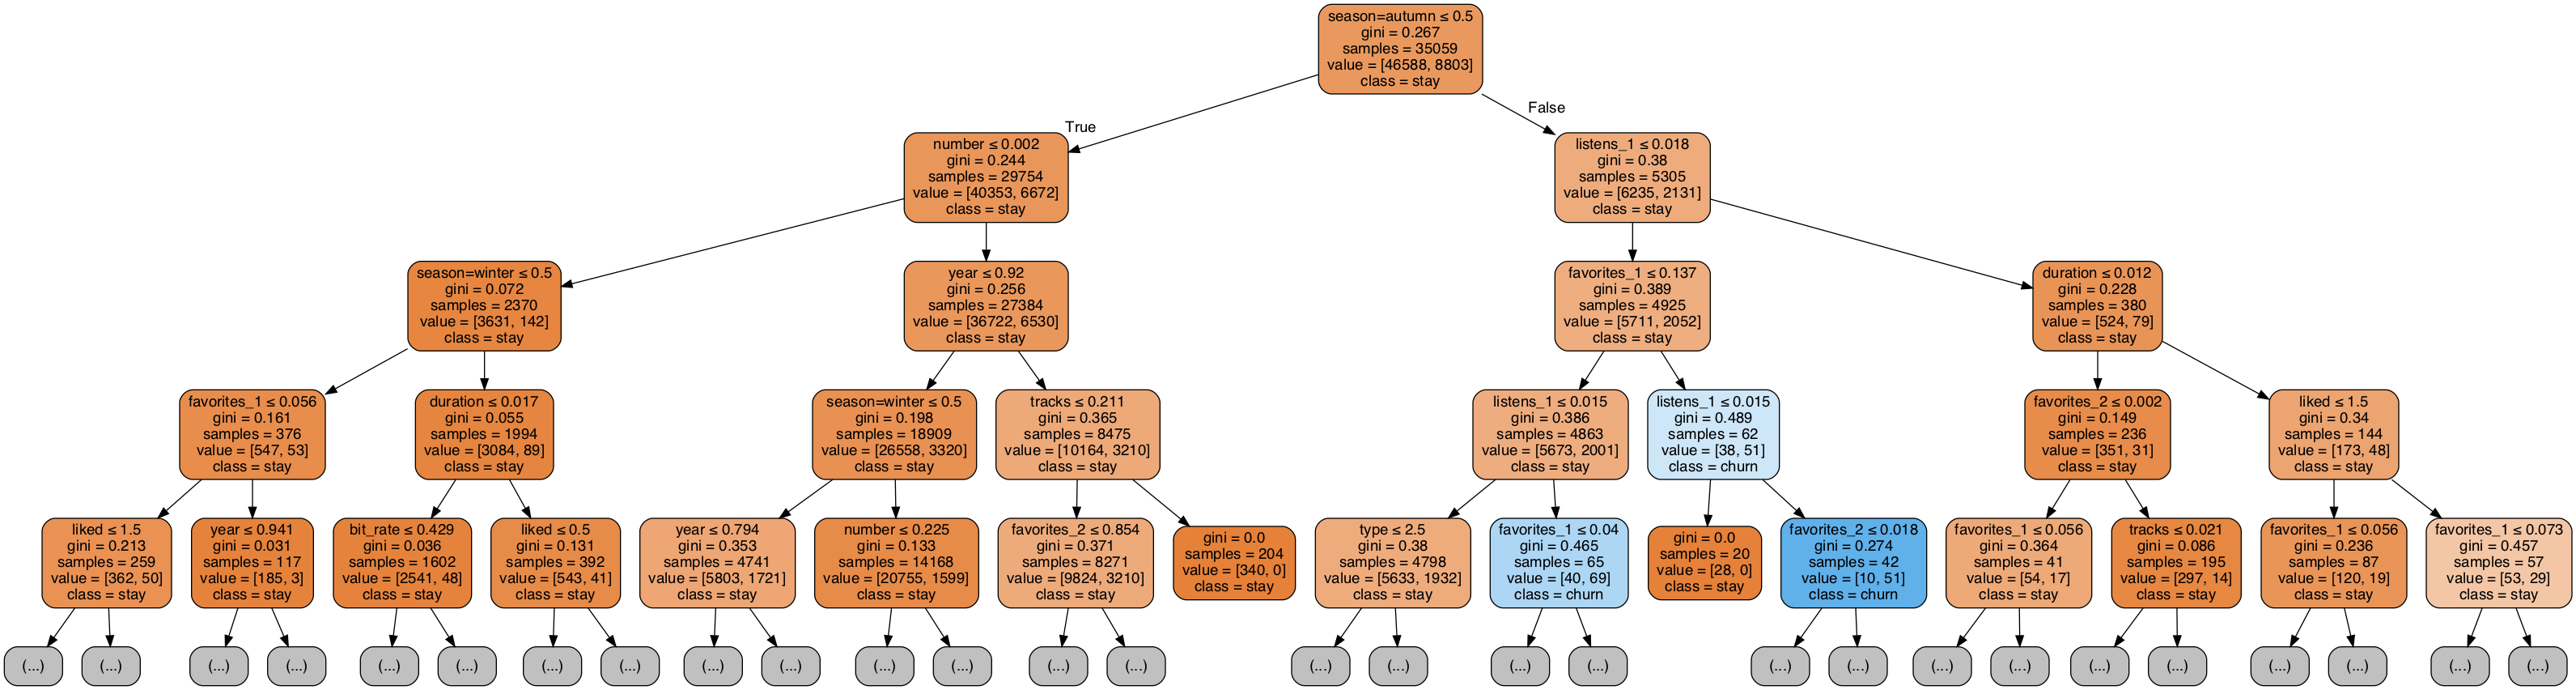

In [48]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [49]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.9694174143813977
F1-score [0.98209088 0.89538905]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     19947
         1.0       0.99      0.82      0.90      3792

    accuracy                           0.97     23739
   macro avg       0.98      0.91      0.94     23739
weighted avg       0.97      0.97      0.97     23739



In [50]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.9694174143813977
F1-score [0.98209088 0.89538905]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     19947
         1.0       0.99      0.82      0.90      3792

    accuracy                           0.97     23739
   macro avg       0.98      0.91      0.94     23739
weighted avg       0.97      0.97      0.97     23739



In [51]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.8402628585871351
F1-score [0.91319874 0.        ]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     19947
         1.0       0.00      0.00      0.00      3792

    accuracy                           0.84     23739
   macro avg       0.42      0.50      0.46     23739
weighted avg       0.71      0.84      0.77     23739

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CV

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=10)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.967 +/- 0.002


# Hyperparameter tuning

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [18]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1,3,5,7,9],
             }


random_search = RandomizedSearchCV(clf, param_distributions=param_list, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

y_pred = clf.predict(X_val)


print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.9653313113442015
F1-score [0.9797525  0.87951984]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     19947
         1.0       0.99      0.79      0.88      3792

    accuracy                           0.97     23739
   macro avg       0.98      0.90      0.93     23739
weighted avg       0.97      0.97      0.96     23739



In [19]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 5, 'min_samples_leaf': 9}

# Bagging

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [21]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.9826867180588904
F1-score [0.98977383 0.94359819]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     19947
         1.0       0.98      0.91      0.94      3792

    accuracy                           0.98     23739
   macro avg       0.98      0.95      0.97     23739
weighted avg       0.98      0.98      0.98     23739



In [13]:
clf = BaggingClassifier(base_estimator=SVC(C=0.5), n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.8402628585871351
F1-score [0.91319874 0.        ]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     19947
         1.0       0.00      0.00      0.00      3792

    accuracy                           0.84     23739
   macro avg       0.42      0.50      0.46     23739
weighted avg       0.71      0.84      0.77     23739

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.9524832554025022
F1-score [0.97246228 0.82688766]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     19947
         1.0       0.99      0.71      0.83      3792

    accuracy                           0.95     23739
   macro avg       0.97      0.85      0.90     23739
weighted avg       0.95      0.95      0.95     23739



# Boosting

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [17]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.8405998567757699
F1-score [0.91266214 0.08863198]
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     19947
         1.0       0.51      0.05      0.09      3792

    accuracy                           0.84     23739
   macro avg       0.68      0.52      0.50     23739
weighted avg       0.79      0.84      0.78     23739



In [18]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.9700492859850879
F1-score [0.98246393 0.89744699]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     19947
         1.0       0.99      0.82      0.90      3792

    accuracy                           0.97     23739
   macro avg       0.98      0.91      0.94     23739
weighted avg       0.97      0.97      0.97     23739

